## Decision Tree Implementation

We will be using the sklearn tree package for Decision Trees.  The documentation is [here](https://scikit-learn.org/stable/modules/tree.html).

In [17]:
#import packages
#standard packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

##support vector machine package
from sklearn import svm 
#evaulation metrics
from sklearn import metrics

#NLP packages
import nltk
from nltk.stem import WordNetLemmatizer #lemmatizer
from nltk.corpus import stopwords
import string #load punctuation charachers

# bag of words
from sklearn.feature_extraction.text import CountVectorizer

#Text processing packages
import re
!pip install emoji==1.7
#for emojis
import emoji

#testing and training set splitting function
from sklearn.model_selection import train_test_split

# decision tree package
from sklearn import tree

print("packages imported")

packages imported


In [18]:
## generate some example data
## this is the same data from last week 
X = [[1,1],[1,2],[1,7],[2,2],[2,4],[2,5],[3,2],[3,4],[3,6],[4,4],[4,6],[4,7],[5,7],[4,1],[5,2],[5,3],[6,2],[6,4],[7,1],[7,3],[7,6],[8,2],[8,5],[8,6]]
Y = [0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1]

# split the data into a 70% for training
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3,random_state=109) # 70% training and 30% test

#Generate the decision tree classifier
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train) #fit the tree

[Text(0.6666666666666666, 0.875, 'x[0] <= 4.5\ngini = 0.469\nsamples = 16\nvalue = [10, 6]'),
 Text(0.5, 0.625, 'x[1] <= 1.5\ngini = 0.165\nsamples = 11\nvalue = [10, 1]'),
 Text(0.3333333333333333, 0.375, 'x[0] <= 2.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]')]

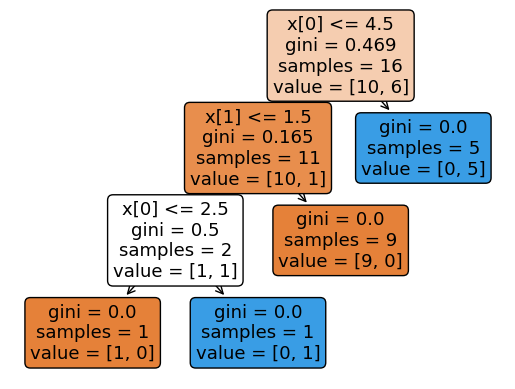

In [19]:
# can visualize the tree, as well as get some information about how 
# the splits are being made by visualizing the tree
tree.plot_tree(clf,rounded=True, 
               filled = True)
## generally not a good idea for very large trees -- there
## are some other coding ways to visualize the trees, but
## we often don't see these diagrams for large data sets
## there's a decent blog post here 
## https://mljar.com/blog/visualize-decision-tree/
## about some different ways to visualize them

In [20]:
# check how "good" the tree is by using the testing set

#Predict the response for test dataset
y_predicted = clf.predict(X_test)

print(y_predicted)
print(y_test)

[1 0 1 1 0 1 1 1]
[0, 0, 1, 1, 0, 1, 1, 1]


In [21]:
## Here we have one mis-classified point 
## which is predicted as a 1 but is actually a 0

## Let's print the confusion matrix 

## the entries of the confusion matrix are:
## C[0,0] true negatives 
## C[1,0] false negatives  
## C[1,1] true positives
## C[0,1] false positives

## note that this is slightly different than the 
## confusion matrix on the wikipedia page!

C = metrics.confusion_matrix(y_test,y_predicted)

C

array([[2, 1],
       [0, 5]])

In [22]:
## print out the other metrics
## Accuracy -- what fraction of the time is the classifier correct
print("Model Accuracy:",metrics.accuracy_score(y_test, y_predicted))

## Precision -- fraction of true positives divided by the true positives and false positives 
print("Precision:",metrics.precision_score(y_test, y_predicted))

## Recall -- fraction of true positives divided by the true positives and false negatives 
print("Recall:",metrics.recall_score(y_test, y_predicted))

Model Accuracy: 0.875
Precision: 0.8333333333333334
Recall: 1.0


## Natural Language Processing

Here, we will use the same data set as last week, and looking at the "angry" emotion from tweets.  Again, there is a lot of cleaning to do first.

In [23]:
newdata_set = pd.read_csv('data3-test.txt',encoding='utf-8',sep="\t")
training_set = pd.read_csv('data3-train.txt',encoding='utf-8',sep="\t")

### following the data cleaning protocol on the kaggle website
#extract hashtags from training data and put them in new column named hashtag 
training_set["hashtags"]=training_set["Tweet"].apply(lambda x:re.findall(r"#(\w+)",x))

#extract hashtags from new data and put them in new column named hashtag 
newdata_set["hashtags"]=newdata_set["Tweet"].apply(lambda x:re.findall(r"#(\w+)",x))

FileNotFoundError: [Errno 2] No such file or directory: 'data3-test.txt'

In [ ]:
#translate emojis in training
training_set["clean"]=training_set["Tweet"].apply(lambda x: emoji.demojize(x))

#translate emojis in new data
newdata_set["clean"]=newdata_set["Tweet"].apply(lambda x: emoji.demojize(x))

#remove urls in training
training_set["clean"]=training_set["clean"].apply(lambda x: re.sub(r"http:\S+",'',x))

#remove urls in new data
newdata_set["clean"]=newdata_set["clean"].apply(lambda x: re.sub(r"http:\S+",'',x))

#tokenize training tweet
training_set["clean"]=training_set["clean"].apply(lambda x: nltk.word_tokenize(str(x).lower()))

#tokenize new data tweet
newdata_set["clean"]=newdata_set["clean"].apply(lambda x: nltk.word_tokenize(str(x).lower()))

In [ ]:
#remove stopwords and punctuations
stopwrds = set(stopwords.words('english'))

#training data
training_set["clean"]=training_set["clean"].apply(lambda x: [y for y in x if (y not in stopwrds)]) ##stop words
training_set["clean"]=training_set["clean"].apply(lambda x: [re.sub(r'['+string.punctuation+']','',y) for y in x]) ## punctuation
training_set["clean"]=training_set["clean"].apply(lambda x: [re.sub('\\n','',y) for y in x]) ##whitespace

#new data
newdata_set["clean"]=newdata_set["clean"].apply(lambda x: [y for y in x if (y not in stopwrds)])
newdata_set["clean"]=newdata_set["clean"].apply(lambda x: [re.sub(r'['+string.punctuation+']','',y) for y in x])
newdata_set["clean"]=newdata_set["clean"].apply(lambda x: [re.sub('\\n','',y) for y in x])

#clean unneeded spaces or empty columns or non sense words
#training data
training_set["clean"]=training_set["clean"].apply(lambda x: [y for y in x if y.strip() != '' and len(y.strip())>2])

#new data
newdata_set["clean"]=newdata_set["clean"].apply(lambda x: [y for y in x if y.strip() != '' and len(y.strip())>2])

#save Cleaned tweets

#training data
training_set=training_set[["clean","hashtags","anger","anticipation","disgust","fear","joy","love","optimism","pessimism","sadness","surprise","trust"]]
#new data
newdata_set=newdata_set[["clean","hashtags","anger","anticipation","disgust","fear","joy","love","optimism","pessimism","sadness","surprise","trust"]]

In [ ]:
#convert tokenize tweets to sentences
training_set["clean"]=training_set["clean"].apply(lambda x: ' '.join(x).replace('\\n',''))

newdata_set["clean"]=newdata_set["clean"].apply(lambda x: ' '.join(x).replace('\\n',''))


## make a function that will lemmatize
## see https://gist.github.com/MaxHalford/68b584e9154098151e6d9b5aa7464948
## so that we can use lemmatization as the method to generate
## the words in the bag of words using CountVectorizer
def lemmatize(text):
    text = ''.join([ch for ch in text if ch not in string.punctuation])
    tokens = nltk.word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

vectorizer = CountVectorizer(tokenizer=lemmatize,binary = True, ngram_range=(1,2))
text_vectors = vectorizer.fit_transform(training_set["clean"])

In [ ]:
## Run a decision tree to classify the tweets into anger

#Generate the vectors for the classifier for anger
X_train_anger = text_vectors
Y_train_anger = training_set["anger"]
#split the training set
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X_train_anger,Y_train_anger, test_size=0.3,random_state=37) # 70% training and 30% test
#fit the tree
Tree_classifier_anger = tree.DecisionTreeClassifier() # Linear Kernel
Tree_classifier_anger.fit(X_train_a, y_train_a)

In [ ]:
## now that it is fitted, let's see how "good" it is at
## predicting anger from tweets
y_predicted_a = Tree_classifier_anger.predict(X_test_a)

print(y_predicted_a[10]) ## can manually check some values
print(y_test_a[10])

In [ ]:
## the entries of the confusion matrix are:
## C[0,0] true negatives 
## C[1,0] false negatives  
## C[1,1] true positives
## C[0,1] false positives

C = metrics.confusion_matrix(y_test_a,y_predicted_a)

C

In [ ]:
#evaluation metrics
print("Model Accuracy:",metrics.accuracy_score(y_test_a, y_predicted_a))

print("Precision:",metrics.precision_score(y_test_a, y_predicted_a))

print("Recall:",metrics.recall_score(y_test_a, y_predicted_a))

In [ ]:
## seems to not do too bad... but is worse than SVM 

## let's classify unknown tweets now with the trained 
## Decision tree

text_vectors_1 = vectorizer.transform(newdata_set["clean"])
print(text_vectors_1.to_array())
## why .transform here and .fit_transform above? 
## fit_transform() is used on the training data so that we can 
## scale the training data and also learn the mean/variance/other parameters 
## of that data. 
y_test_a_predicted = Tree_classifier_anger.predict(text_vectors_1)

print(np.count_nonzero(y_test_a_predicted == 0))
print(np.count_nonzero(y_test_a_predicted == 1))

For comparison, the SVM model predicted:

2494

765